## Modeling

We will import the training and test dataset that have already been cleaned and preprocessed in  separate notebooks and will do the modelling and evaluation of the datasets.

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import r2_score

%matplotlib inline

In [2]:
#Read the cleaned csv's
#The features are hand picked after feature engineering process in the cleaned datasets.
train_df = pd.read_csv('datasets/train_clean.csv')
test_df = pd.read_csv('datasets/test_clean.csv')

In [3]:
#Set the indexes
train_df.set_index('Id', inplace = True)
test_df.set_index('Id', inplace = True)

In [4]:
#Check the shape of data
print("Train data shape:",train_df.shape)
print("Test data shape:",test_df.shape)

Train data shape: (2043, 199)
Test data shape: (879, 197)


In [5]:
pd.options.display.max_columns = None
display(train_df.head())
display(test_df.head())

,Unnamed: 0,Lot Frontage,Lot Area,Lot Shape,Land Slope,Overall Qual,Overall Cond,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Electrical,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Finish,Garage Area,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,SalePrice,Garage Age,TotalPorchArea,Property_age,Remod Age,MS SubClass_120,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Alley_Grvl,Alley_None,Alley_Pave,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Artery,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Exterior 1st_AsbShng,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsbShng,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkCmn,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Central Air_N,Central Air_Y,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_None,Misc Feature_Gar2,Misc Feature_None,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
109,0,0.0,13517,2,2,6,8,289.0,3,2,3,3,1,6,533.0,1,192.0,725.0,4,4,725,754,1479,0.0,2,1,3,1,3,6,7,0,0,2,475.0,3,3,2,0,0,130500,45.0,44,45,16,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
544,1,43.0,11492,2,2,7,5,

,Lot Frontage,Lot Area,Lot Shape,Land Slope,Overall Qual,Overall Cond,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Finish,Garage Area,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Garage Age,TotalPorchArea,Property_age,Remod Age,MS SubClass_120,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Alley_Grvl,Alley_None,Alley_Pave,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Artery,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Exterior 1st_AsbShng,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_PreCast,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsbShng,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Other,Exterior 2nd_Plywood,Exterior 2nd_PreCast,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkCmn,Mas Vnr Type_BrkFace,Mas Vnr Type_CBlock,Mas Vnr Type_None,Mas Vnr Type_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Central Air_N,Central Air_Y,Electrical_1,Electrical_2,Electrical_3,Electrical_4,Electrical_None,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_None,Misc Feature_Gar2,Misc Feature_None,Misc Feature_Othr,Misc Feature_Shed,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2658,69.0,9142,3,2,6,8,0.0,2,1,2,3,1,1,0,1,1020,1020,3,908,1020,1928,0,2,0,4,2,1,9,7,0,0,1,440,1,1,2,0,0,111.0,172,111,71,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2718,0.0,9662,2,2,5,4,0.0,2,2,4,3,1,1,0,1,1967,1967,2,1967,0,1967,0,2,0,6,2,2,10,7,0,

There is a differnce between features in the training data set and the test dataset. Therefore will use only the features that are present in both sets

In [ ]:
#creating a list of train_df features
train_list = train_df.columns.to_list()

In [7]:
#creating a list of test_df features
test_list = test_df.columns.to_list()

In [8]:
#Select only the common features
common_features=set(test_list).intersection(set(train_list))
common_features

{'1st Flr SF',
 '2nd Flr SF',
 'Alley_Grvl',
 'Alley_None',
 'Alley_Pave',
 'Bedroom AbvGr',
 'Bldg Type_1Fam',
 'Bldg Type_2fmCon',
 'Bldg Type_Duplex',
 'Bldg Type_Twnhs',
 'Bldg Type_TwnhsE',
 'Bsmt Cond',
 'Bsmt Exposure',
 'Bsmt Full Bath',
 'Bsmt Qual',
 'Bsmt Unf SF',
 'BsmtFin SF 1',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Central Air_N',
 'Central Air_Y',
 'Condition 1_Artery',
 'Condition 1_Feedr',
 'Condition 1_Norm',
 'Condition 1_PosA',
 'Condition 1_PosN',
 'Condition 1_RRAe',
 'Condition 1_RRAn',
 'Condition 1_RRNe',
 'Condition 1_RRNn',
 'Exter Cond',
 'Exter Qual',
 'Exterior 1st_AsbShng',
 'Exterior 1st_AsphShn',
 'Exterior 1st_BrkComm',
 'Exterior 1st_BrkFace',
 'Exterior 1st_CemntBd',
 'Exterior 1st_HdBoard',
 'Exterior 1st_MetalSd',
 'Exterior 1st_Plywood',
 'Exterior 1st_Stucco',
 'Exterior 1st_VinylSd',
 'Exterior 1st_Wd Sdng',
 'Exterior 1st_WdShing',
 'Exterior 2nd_AsbShng',
 'Exterior 2nd_AsphShn',
 'Exterior 2nd_Brk Cmn',
 'Exterior 2nd_BrkFace',
 'Exterior 2

In [9]:
print(train_df.shape)
print(test_df.shape)

(2043, 199)
(879, 197)


In [10]:
#Select predictors
X = train_df[common_features]

In [11]:
#Select target variable
y = train_df['SalePrice']

In [12]:
print(X.shape)
print(y.shape)

(2043, 187)
(2043,)


### Train-test-split training data

In [13]:
# Split the data into training sets and test sets
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.25)

In [14]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(1532, 187)
(1532,)
(511, 187)
(511,)


In [15]:
#Scaling
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_val_scaled = ss.transform(X_val)


## Modelling

#### Model 1: Linear Regression

In [66]:
lr =LinearRegression()

In [67]:
lr.fit(X_train_scaled,y_train)

LinearRegression()

In [68]:
lr.score(X_train_scaled,y_train)

0.9162445810161266

In [69]:
y_train_preds = lr.predict(X_train_scaled)

In [70]:
rmse = np.sqrt(mean_squared_error(y_train,y_train_preds))
print('rmse score of training set is ',rmse)

rmse score of training set is  22361.884112592124


In [71]:
r2_score(y_train,y_train_preds)

0.9162445810161266

In [72]:
y_val_preds = lr.predict(X_val_scaled)

In [73]:
rmse = np.sqrt(mean_squared_error(y_val,y_val_preds))
print('rmse score of testing set is ', rmse)

rmse score of testing set is  25983.918665955847


In [74]:
r2_score(y_val, y_val_preds)

0.9027544543459689

#### Model 2: Ridge Regression

In [25]:
ridge = RidgeCV(alphas = np.logspace(0, 3, 1000))

In [26]:
ridge.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([   1.        ,    1.00693863,    1.01392541,    1.02096066,
          1.02804473,    1.03517796,    1.04236067,    1.04959323,
          1.05687597,    1.06420924,    1.0715934 ,    1.07902879,
          1.08651577,    1.09405471,    1.10164595,    1.10928986,
          1.11698682,    1.12473718,    1.13254132,    1.1403996 ,
          1.14831241,    1.15628013,    1.16430313,    1.1723818 ,
          1.18051653,    1.1887077 ,    1.1969557 ,    1.20526094,
          1.2136238 ,    1.22204469,    1.230524  ,    1.2...
        829.69585208,  835.45280584,  841.24970497,  847.08682666,
        852.96444997,  858.88285595,  864.84232757,  870.84314977,
        876.88560946,  882.96999555,  889.09659895,  895.2657126 ,
        901.47763145,  907.73265252,  914.03107488,  920.37319966,
        926.75933011,  933.18977157,  939.6648315 ,  946.18481947,
        952.75004724,  959.36082871,  966.01747995,  972.72031925,
        979.46966707,  986.26584613,  993.10918137, 

In [27]:
ridge.alpha_

183.76562003881705

In [28]:
ridge_cv_scores = cross_val_score(ridge, X_train_scaled, y_train, cv = 5)
ridge_cv_scores.mean()

0.9082092741026969

In [29]:
ridge_preds = ridge.predict(X_val_scaled)
ridge.score(X_val_scaled, y_val)

0.9070374626189944

In [30]:
y_train_preds = ridge.predict(X_train_scaled)

In [31]:
np.sqrt(mean_squared_error(ridge_preds, y_val))

24091.549544035817

#### Model 3: Lasso Regression

In [32]:
lasso = LassoCV(n_alphas = 2000)
lasso.fit(X_train_scaled, y_train)

LassoCV(n_alphas=2000)

In [33]:
lasso_cv_scores = cross_val_score(lasso, X_train_scaled, y_train, cv = 5)
lasso_cv_scores.mean()

0.9065285465635438

In [34]:
lasso_preds = lasso.predict(X_val_scaled)
lasso.score(X_val_scaled, y_val)

0.9087096713498152

In [35]:
np.sqrt(mean_squared_error(lasso_preds, y_val))

23873.88705854806

The RMSE score of Lasso is better than the ridge model. Therefore will use Lasso model for further evaluation and prediction.

In [36]:
#Get significant coefficients that are identified by lasso

In [37]:
lasso_coef = pd.Series(lasso.coef_,index = X.columns).sort_values(ascending = False).\
to_frame(name = 'Coefficients')

In [38]:
#Significant features
lasso_coef[lasso_coef['Coefficients'] != 0]


,Coefficients
Gr Liv Area,22225.595044
Overall Qual,12304.950016
BsmtFin SF 1,9583.868899
Mas Vnr Area,7552.264186
Total Bsmt SF,6068.526812
...,...
Bedroom AbvGr,-1449.472136
Bsmt Cond,-1484.167540
Roof Style_Mansard,-2531.971872
Mas Vnr Type_BrkFace,-3558.493842


In [39]:
lasso_coef.head(20)

,Coefficients
Gr Liv Area,22225.595044
Overall Qual,12304.950016
BsmtFin SF 1,9583.868899
Mas Vnr Area,7552.264186
Total Bsmt SF,6068.526812
Exter Qual,5872.176129
Neighborhood_NridgHt,5781.868548
Neighborhood_StoneBr,5734.807780
Bldg Type_1Fam,5546.347464
Overall Cond,5003.913846


In [76]:
lasso_coef.tail(20)

,Coefficients
Kitchen AbvGr,-563.429405
Exterior 1st_Wd Sdng,-566.165680
Sale Type_COD,-567.126315
Mas Vnr Type_BrkCmn,-586.671020
MS SubClass_120,-616.892083
MS Zoning_C (all),-631.703311
MS Zoning_RM,-640.518970
MS SubClass_160,-641.232867
Condition 1_RRNn,-738.032495
MS SubClass_80,-866.503725


In [40]:
significant_coef = pd.concat([lasso_coef.head(20),
                     lasso_coef.tail(20)])

In [41]:
significant_features = significant_coef.index.to_list()

In [42]:
significant_features

['Gr Liv Area',
 'Overall Qual',
 'BsmtFin SF 1',
 'Mas Vnr Area',
 'Total Bsmt SF',
 'Exter Qual',
 'Neighborhood_NridgHt',
 'Neighborhood_StoneBr',
 'Bldg Type_1Fam',
 'Overall Cond',
 'Lot Area',
 'Sale Type_New',
 'Garage Area',
 'Bsmt Exposure',
 'Kitchen Qual',
 'Functional',
 '1st Flr SF',
 'Exterior 1st_BrkFace',
 'Roof Style_Hip',
 'TotRms AbvGrd',
 'Kitchen AbvGr',
 'Exterior 1st_Wd Sdng',
 'Sale Type_COD',
 'Mas Vnr Type_BrkCmn',
 'MS SubClass_120',
 'MS Zoning_C (all)',
 'MS Zoning_RM',
 'MS SubClass_160',
 'Condition 1_RRNn',
 'MS SubClass_80',
 'House Style_2.5Fin',
 'Condition 1_Artery',
 'Remod Age',
 'Foundation_CBlock',
 'Neighborhood_NWAmes',
 'Bedroom AbvGr',
 'Bsmt Cond',
 'Roof Style_Mansard',
 'Mas Vnr Type_BrkFace',
 'Property_age']

In [43]:
#Insignificant features identified by lasso
insignificant_features = (lasso_coef[lasso_coef['Coefficients'] == 0])
insignificant_features

,Coefficients
Garage Cond,-0.0
Garage Type_Basment,-0.0
Land Contour_Lvl,0.0
Sale Type_WD,-0.0
Alley_None,0.0
...,...
House Style_1Story,0.0
Garage Type_Detchd,0.0
Condition 1_RRAn,-0.0
House Style_SLvl,-0.0


Let's use the best model with only using the significant features on the whole training data.

In [44]:
#Use only the significant variables on train dataset and train on lasso model
X = X[significant_features]

In [45]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state = 42)

In [46]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_val_scaled = ss.transform(X_val)

In [47]:
lasso = LassoCV(n_alphas = 2000)
lasso.fit(X_train_scaled, y_train)

LassoCV(n_alphas=2000)

In [48]:
lasso_cv_scores = cross_val_score(lasso, X_train_scaled, y_train, cv = 3)
lasso_cv_scores.mean()

0.9053721552064506

In [49]:
lasso_preds = lasso.predict(X_val_scaled)
lasso.score(X_val_scaled, y_val)

0.9019776850727413

In [50]:
np.sqrt(mean_squared_error(lasso_preds, y_val))

26087.488267253255

In [51]:
residuals = lasso_preds - y_val

Text(0, 0.5, 'Predicted Price (lasso_preds)')

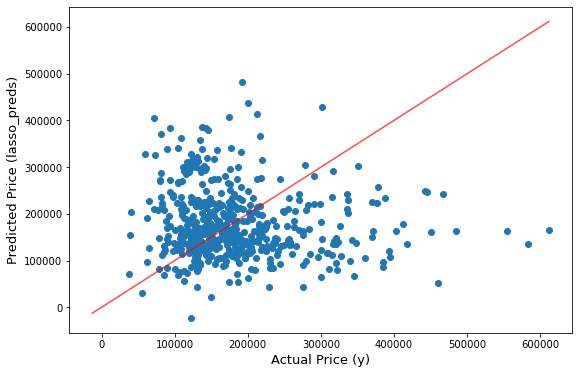

In [52]:
plt.figure(figsize = (9, 6))
plt.scatter(x = y_val, y = ridge_preds)
maxDist = max(max(lasso_preds), max(y_val)) 
minDist = min(min(lasso_preds), min(y_val)) 
sns.lineplot((minDist, maxDist), (minDist, maxDist), color = 'red', alpha = 0.7) 
plt.xlabel('Actual Price (y)', fontdict= {'fontsize':13})
plt.ylabel('Predicted Price (lasso_preds)', fontdict= {'fontsize':13})

Text(0, 0.5, 'Residuals')

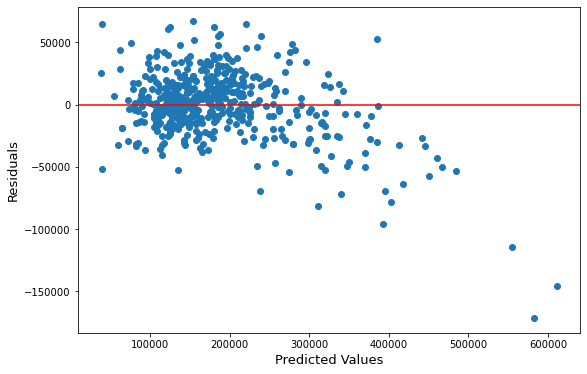

In [53]:
plt.figure(figsize=(9,6))
plt.scatter(y_val, residuals)
plt.axhline(0, color = 'red')
plt.xlabel('Predicted Values', fontdict = {'fontsize':13})
plt.ylabel('Residuals', fontdict = {'fontsize':13})

### Test Predictions

We will apply Lasso model on test data as it seemed to predict best results.

In [54]:
X_test = test_df[significant_features]

In [55]:
X_test_scaled = ss.fit_transform(X_test)
X_test_scaled.shape

(879, 40)

In [56]:
preds = lasso.predict(X_test_scaled)
preds

array([143583.15003258, 152887.95610794, 226521.2612455 , 116918.83329225,
       163748.10261067,  88753.99116851, 107401.33330843, 155480.0333089 ,
       189605.13292136, 163011.50363476, 161171.04657712, 121801.92064375,
       156074.14958176, 241190.17803912, 170690.34849049, 116054.52842998,
       141558.92747652, 128763.8378672 , 177844.51665937, 188259.09625391,
       143512.35149493, 122913.83326773, 189066.73254078, 169408.18409045,
       188844.73756638, 134307.61790721, 126230.51033346, 132472.29155355,
       170773.46836201,  44061.03173396, 110875.4741362 , 100807.52004815,
       214782.77534392, 161410.48363135, 206823.7915778 , 194320.65207525,
       127339.3214086 ,  73545.8103065 , 127056.8876871 , 180257.25234785,
       182237.0902259 , 207247.64260276, 153235.66394227, 164981.10024438,
       222451.73395567,  92846.07709783, 222503.13455871, 116712.9161804 ,
       120152.43298471, 127781.61823333, 116185.7657154 , 224030.6801668 ,
       242325.53905909, 1

In [57]:
X_test['SalePrice'] = preds
X_test.head()

,Gr Liv Area,Overall Qual,BsmtFin SF 1,Mas Vnr Area,Total Bsmt SF,Exter Qual,Neighborhood_NridgHt,Neighborhood_StoneBr,Bldg Type_1Fam,Overall Cond,Lot Area,Sale Type_New,Garage Area,Bsmt Exposure,Kitchen Qual,Functional,1st Flr SF,Exterior 1st_BrkFace,Roof Style_Hip,TotRms AbvGrd,Kitchen AbvGr,Exterior 1st_Wd Sdng,Sale Type_COD,Mas Vnr Type_BrkCmn,MS SubClass_120,MS Zoning_C (all),MS Zoning_RM,MS SubClass_160,Condition 1_RRNn,MS SubClass_80,House Style_2.5Fin,Condition 1_Artery,Remod Age,Foundation_CBlock,Neighborhood_NWAmes,Bedroom AbvGr,Bsmt Cond,Roof Style_Mansard,Mas Vnr Type_BrkFace,Property_age,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2658,1928,6,0,0.0,1020,2,0,0,0,8,9142,0,440,1,1,7,908,0,0,9,2,0,0,0,0,0,1,0,0,0,0,0,71,0,0,4,3,0,0,111,143583.150033
2718,1967,5,0,0.0,1967,2,0,0,0,4,9662,0,580,1,2,7,1967,0,0,10,2,0,0,0,0,0,0,0,0,0,0,0,44,1,0,6,3,0,0,44,152887.956108
2414,1496,7,554,0.0,654,3,0,0,1,5,17104,1,426,3,3,7,664,0,0,7,1,0,0,0,0,0,0,0,0,0,0,0,15,0,0,3,4,0,0,15,226521.261246
1989,968,5,0,0.0,968,3,0,0,1,6,8520,0,480,1,2,7,968,0,0,5,1,1,0,0,0,0,1,0,0,0,0,0,15,1,0,2,3,0,0,98,116918.833292
625,1394,6,609,247.0,1394,2,0,0,1,5,9500,0,514,1,2,7,1394,0,0,6,1,0,0,0,0,0,0,0,0,0,0,0,58,1,0,3,3,0,1,58,163748.102611


In [58]:
submission = X_test[['SalePrice']]
submission.head()

,SalePrice
Id,
2658,143583.150033
2718,152887.956108
2414,226521.261246
1989,116918.833292
625,163748.102611


In [59]:
submission.shape

(879, 1)

In [60]:
submission.to_csv('datasets/prices.csv')

In [61]:
#Plot significant coefs
def plot_coef(model, top_n = 10):
    cols = X_train.columns
    coef = model.coef_
    zipped = list(zip(cols, coef))
    zipped.sort(key=lambda x: x[1], reverse = True)
    top_10 = pd.DataFrame(zipped).head(top_n)
    bottom_10 = pd.DataFrame(zipped).tail(top_n)
    return pd.concat([top_10, bottom_10], axis=0).plot.barh(x = 0, y = 1)

<AxesSubplot:ylabel='0'>

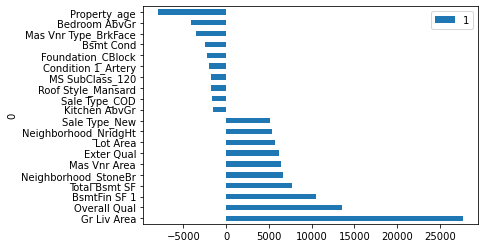

In [62]:
plot_coef(lasso)

## Conclusion and Recommendations

#### Top 5 features from final Lasso Regression model

 The top feature that highly influence the price at a coefficient of 22182.01 is property with higher Ground Living area squarefeet. It is no wonder the best predictor as this size of the property greatly influences the Saleprice. At number two, Overall Quality of the property takes the spot and is no suprise that it is one of the top predictors in property prices. Next is the property located in Northridge Heights neighborhood.It is no wonder the best predictor as this neighbourhood is very convenient and is the closest to Iowa State University, the largest university in Iowa state and also very close to downtown. It is very close to elementary, middle and high schools and have amenities really close by.

 Finally, some of the neighborhoods that influence high saleprices are from the lasso coefficients are
 1. Northridge Heights
 2. Stone Brook
 3. Northridge
 

### Recommendations 

Square feet area, property age, Overall conditions and location are the most important determinant factors of Saleprice.
People looking to sell should do it sooner rather than later as the property age seems the affect the saleprice in a negative way.

To increase the value of a home, one could try to
- Renovate the kitchen
- Remodel the interior and exterior finish
- Add fireplace(if not present already)
- Renovate Garage
- Renovate house if not in good condition
